In [26]:
#!connect jupyter --kernel-name pythonkernel --kernel-spec python3

#r "nuget:ScottPlot, 5.0.*"

Error: ScottPlot version 5.0.* cannot be added because version 5.0.56 was added previously.

In [27]:
using System.Numerics;

static T Median<T>(this IEnumerable<T> collection) where T : INumber<T> 
{
    var orderedCollection = collection.Order().ToArray();

    var two = T.One + T.One;

    if (orderedCollection.Length == 0)
        return default(T);
    
    if (orderedCollection.Length % 2 == 0) {
        return (orderedCollection[orderedCollection.Length / 2] + orderedCollection[orderedCollection.Length / 2 - 1]) / two;
    } else {
        return orderedCollection[orderedCollection.Length / 2];
    }
}

# Weather data

Monthly average temperature for Germany and Australia

In [28]:
#r "System.Net.Http.Json"

using System.IO;
using System.Net.Http;
using System.Net.Http.Json;

var httpClient = new HttpClient();


record Hourly(DateTime[] Time, float[] Temperature_2m);
record WeatherResponse(Hourly hourly);

(string Lat, string Long) coordinatesMinden = ("52.17", "8.55");
(string Lat, string Long) coordinatesSidney = ("-33.8667", "151.1167");


var responseMinden = await httpClient.GetAsync($"https://archive-api.open-meteo.com/v1/archive?latitude={coordinatesMinden.Lat}&longitude={coordinatesMinden.Long}&start_date=2024-01-01&end_date=2024-12-31&hourly=temperature_2m");
var responseSidney = await httpClient.GetAsync($"https://archive-api.open-meteo.com/v1/archive?latitude={coordinatesSidney.Lat}&longitude={coordinatesSidney.Long}&start_date=2024-01-01&end_date=2024-12-31&hourly=temperature_2m");

// await response.Content.ReadAsStringAsync()
var rawDataMinden = await responseMinden.Content.ReadFromJsonAsync<WeatherResponse>();
var rawDataSidney = await responseSidney.Content.ReadFromJsonAsync<WeatherResponse>();


In [29]:
record MonthData(int Month, float Temperature);

var dataMinden = rawDataMinden.hourly.Time.Zip(rawDataMinden.hourly.Temperature_2m)
    .GroupBy(x => x.First.Month)
    .Select(x => new MonthData(x.Key, x.Select(y => y.Second).Median()))
    .OrderBy(x => x.Month)
    .Select(x => x.Temperature)
    .ToArray();

var dataSidney = rawDataSidney.hourly.Time.Zip(rawDataSidney.hourly.Temperature_2m)
    .GroupBy(x => x.First.Month)
    .Select(x => new MonthData(x.Key, x.Select(y => y.Second).Median()))
    .OrderBy(x => x.Month)
    .Select(x => x.Temperature)
    .ToArray();


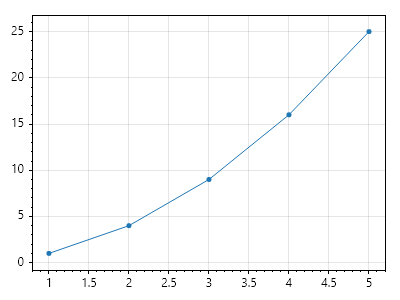

In [30]:

using Microsoft.DotNet.Interactive.Formatting;

Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(400, 300)), HtmlFormatter.MimeType);

// create sample data
double[] dataX = new double[] { 1, 2, 3, 4, 5 };
double[] dataY = new double[] { 1, 4, 9, 16, 25 };

// plot the data
ScottPlot.Plot plt = new();
plt.Add.Scatter(dataX, dataY);
// plt.Add.Scatter(dataX, )

// display the plot
plt

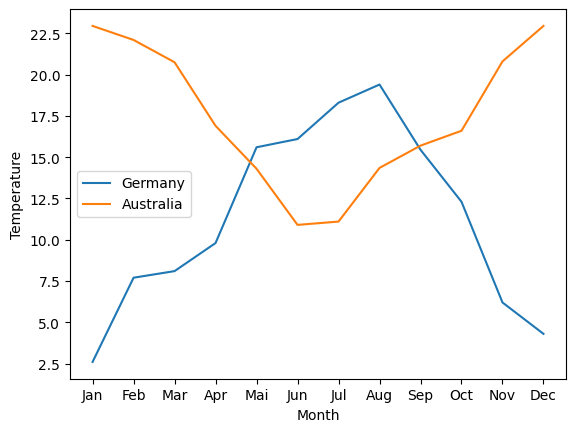

In [31]:
#!set --value @csharp:dataMinden --name minden
#!set --value @csharp:dataSidney --name sidney

import matplotlib.pyplot as plt

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(month_names, minden, label="Germany")
plt.plot(month_names, sidney, label="Australia")
plt.ylabel('Temperature')
plt.xlabel('Month')
plt.legend()
plt.show()


# Aufgabe 2

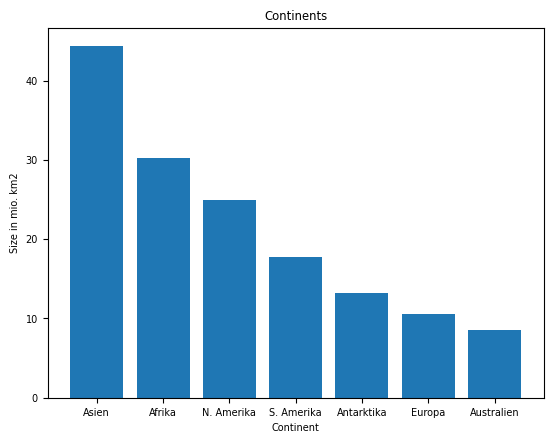

In [49]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 7})

continents = [
    "Asien", 	    #  47 	44,4 	29,68 	8,7 	4750 	59,4 	107,0
 	"Afrika", 	    #  55 	30,3 	20,25 	5,9 	1400 	17,5 	46,2
 	"N. Amerika", 	#  23 	24,9 	16,64 	4,9 	605 	7,6 	21,3
 	"S. Amerika",   #  13 	17,8 	11,90 	3,5 	441 	5,5 	24,7
 	"Antarktika", 	#  - 	13,2 	8,82 	2,6 	0,001 	0 	0
 	"Europa", 	    #  49 	10,5 	7,02 	2,1 	730 	9,4 	69,4
 	"Australien"    #  14 	8,5 	5,68 	1,7 	45 	0,6 	5,3
]

continent_sizes = [
    44.4,
    30.3,
    24.9,
    17.8,
    13.2,
    10.5,
    8.5  
]

continent_psizes = [
    8.7,
    5.9,
    4.9,
    3.5,
    2.6,
    2.1,
    1.7
]

plt.bar(continents, continent_sizes)

plt.ylabel('Size in mio. km2')
plt.xlabel('Continent')
# plt.legend()
plt.title("Continents")
plt.show()


([<matplotlib.patches.Wedge at 0x1cc98a6ca30>,
 [Text(-0.663222493530133, 0.8775738852516481, 'Water: 70.6%'),
  Text(-0.0034555247173097313, -1.0999945724179407, 'Asien: 70.6%'),
  Text(0.48393328189319335, -0.987830237781818, 'Afrika: 8.7%'),
  Text(0.7851137476243933, -0.7704520772190705, 'N. Amerika: 5.9%'),
  Text(0.9589004374326017, -0.5389897504513099, 'S. Amerika: 4.9%'),
  Text(1.0440059070242398, -0.34648472707825756, 'Antarktika: 3.5%'),
  Text(1.0836203687084625, -0.18912138038872373, 'Europa: 2.6%'),
  Text(1.0984316586202039, -0.058718747780141974, 'Australien: 2.1%')])

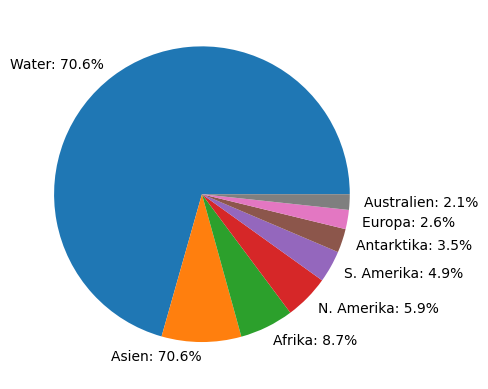

In [43]:
import matplotlib.pyplot as plt

p_water = 100.0;

for s in continent_psizes:
    p_water = p_water - s

continent_psizes2 = continent_psizes.copy()
continent_psizes2.insert(0, p_water)

continents2 = []

for i in range(0, len(continents)):
    c = continents[i]
    p = continent_psizes2[i]
    continents2.append(f'{c}: {p}%')
continents2.insert(0, f'Water: {p_water}%')

fig, ax = plt.subplots()
ax.pie(continent_psizes2, labels=continents2)

# Aufgabe 3

Durchschnittsnoten berechnen

In [34]:
var r = new Random(420);
string[] courses = ["Mathe 3", "KI", "Datenanalyse", "Compilerbau", "Softwaretechnik", "Wissenschaftliches Arbeiten"];

IEnumerable<(string Course, double Mark)> GenerateRandomMarks(IEnumerable<string> courses) => 
    courses.Select(x => (x, ((float)r.Next(2, 12) / 2.0)));


var marks = GenerateRandomMarks(courses).ToArray();

marks

index value 0 (Mathe 3, 1.5) Item1 Mathe 3 Item2 1.5 1 (KI, 1) Item1 KI Item2 1 2 (Datenanalyse, 2.5) Item1 Datenanalyse Item2 2.5 3 (Compilerbau, 2) Item1 Compilerbau Item2 2 4 (Softwaretechnik, 5) Item1 Softwaretechnik Item2 5 5 (Wissenschaftliches Arbeiten, 3.5) Item1 Wissenschaftliches Arbeiten Item2 3.5

In [35]:
record Mark(string Course, double Value);

var averageMarks = Enumerable.Range(1, 10)
    .SelectMany(_ => GenerateRandomMarks(courses))
    .GroupBy(x => x.Course)
    .Select(x => new Mark(x.Key, x.Select(y => y.Mark).Average()))
    .ToArray();

averageMarks

index value 0 Mark { Course = Mathe 3, Value = 2.7 } Course Mathe 3 Value 2.7 1 Mark { Course = KI, Value = 3.45 } Course KI Value 3.45 2 Mark { Course = Datenanalyse, Value = 2.85 } Course Datenanalyse Value 2.85 3 Mark { Course = Compilerbau, Value = 3.35 } Course Compilerbau Value 3.35 4 Mark { Course = Softwaretechnik, Value = 3.9 } Course Softwaretechnik Value 3.9 5 Mark { Course = Wissenschaftliches Arbeiten, Value = 2.8 } Course Wissenschaftliches Arbeiten Value 2.8

In [36]:
#!set --value @csharp:averageMarks --name averageMarks

averageMarks

Course,"""Mathe 3"""
Value,2.7
Course,"""KI"""
Value,3.45
Course,"""Datenanalyse"""
Value,2.85
Course,"""Compilerbau"""
Value,3.35
Course,"""Softwaretechnik"""
Value,3.9
Course,"""Wissenschaftliches Arbeiten"""


In [37]:
var multipleMarks = Enumerable.Range(1, 10)
    .Select(_ => GenerateRandomMarks(courses).Select(x => new Mark(x.Course, x.Mark)).ToArray())
    .ToList(); // <- otherwise a new collection is generated every time the value is requested (including #!set)

In [38]:
#!set --value @csharp:multipleMarks --name multiple_marks

multiple_marks

[[{'Course': 'Mathe 3', 'Value': 1.5},
  {'Course': 'KI', 'Value': 5},
  {'Course': 'Datenanalyse', 'Value': 4},
  {'Course': 'Compilerbau', 'Value': 1},
  {'Course': 'Softwaretechnik', 'Value': 2.5},
  {'Course': 'Wissenschaftliches Arbeiten', 'Value': 5}],
 [{'Course': 'Mathe 3', 'Value': 1.5},
  {'Course': 'KI', 'Value': 4},
  {'Course': 'Datenanalyse', 'Value': 1},
  {'Course': 'Compilerbau', 'Value': 2},
  {'Course': 'Softwaretechnik', 'Value': 3},
  {'Course': 'Wissenschaftliches Arbeiten', 'Value': 1.5}],
 [{'Course': 'Mathe 3', 'Value': 3},
  {'Course': 'KI', 'Value': 1.5},
  {'Course': 'Datenanalyse', 'Value': 3},
  {'Course': 'Compilerbau', 'Value': 5.5},
  {'Course': 'Softwaretechnik', 'Value': 4.5},
  {'Course': 'Wissenschaftliches Arbeiten', 'Value': 5}],
 [{'Course': 'Mathe 3', 'Value': 1.5},
  {'Course': 'KI', 'Value': 2},
  {'Course': 'Datenanalyse', 'Value': 2},
  {'Course': 'Compilerbau', 'Value': 1.5},
  {'Course': 'Softwaretechnik', 'Value': 2},
  {'Course': 'Wissen

Create a series with random marks 

In [39]:
#!set --value @csharp:multipleMarks --name multiple_marks

import pandas as pd


mark_series = []
for m in multiple_marks:
    course = [x['Course'] for x in m]
    mark = [x['Value'] for x in m]

    mark_series.append(pd.Series(mark, index=course))


marks1 = mark_series[0]
marks2 = mark_series[1]

# pd.mean(marks1, marks2)

(marks1 + marks2) / 2

Mathe 3                        1.50
KI                             4.50
Datenanalyse                   2.50
Compilerbau                    1.50
Softwaretechnik                2.75
Wissenschaftliches Arbeiten    3.25
dtype: float64

In [40]:
marks1

Mathe 3                        1.5
KI                             5.0
Datenanalyse                   4.0
Compilerbau                    1.0
Softwaretechnik                2.5
Wissenschaftliches Arbeiten    5.0
dtype: float64

In [41]:
marks2

Mathe 3                        1.5
KI                             4.0
Datenanalyse                   1.0
Compilerbau                    2.0
Softwaretechnik                3.0
Wissenschaftliches Arbeiten    1.5
dtype: float64